## Astrocytes

525 525 3


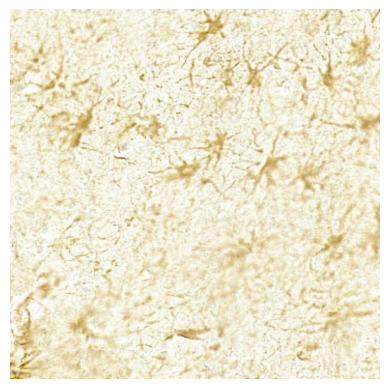

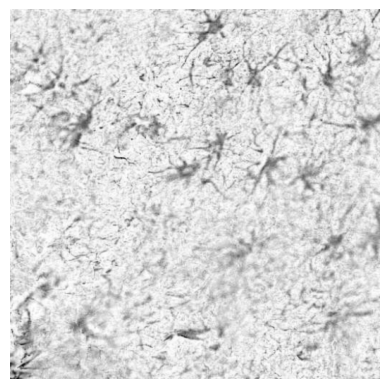

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#resize
img = cv2.imread("/home/htic/Desktop/raisa/B_313_1373/tile_31744_218624.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height,width,channels=img.shape
#print(f"{height} {width} {channels}")
#525 527 3

img=cv2.resize(img,(525,525))
height,width,channels=img.shape
print(f"{height} {width} {channels}")

#rgb image
plt.imshow(img)
plt.axis('off')
plt.show()

#grayscale image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()

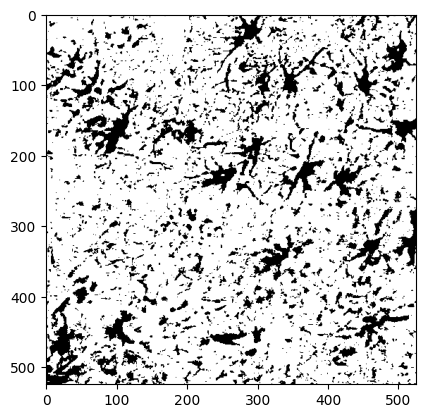

In [82]:
clahe = cv2.createCLAHE(clipLimit=5)
clahe_img = np.clip(clahe.apply(img_gray) + 20, 0, 255).astype(np.uint8)
_, threshold_img = cv2.threshold(img_gray, 210, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_img,cmap='gray')

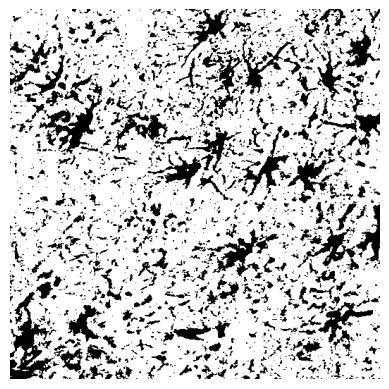

In [83]:

_, otsu_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(otsu_thresh,cmap='gray')

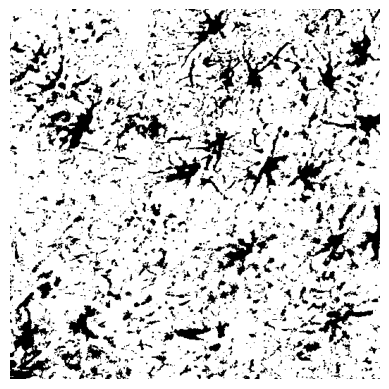

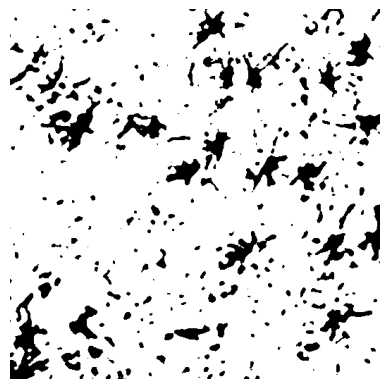

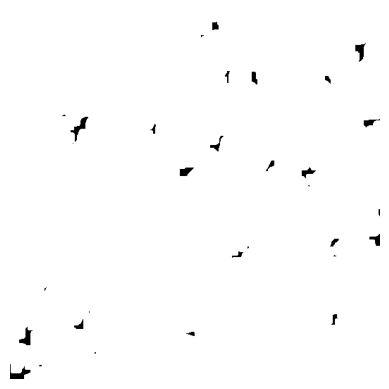

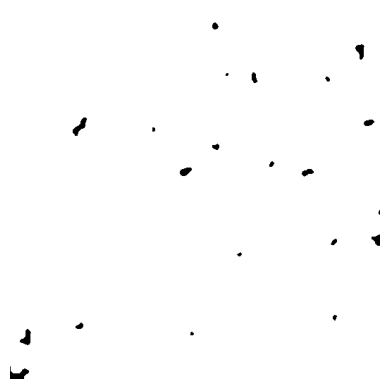

In [84]:
output=threshold_img.copy()
blurred = cv2.GaussianBlur(output, (3, 3), 0)
median_blurred = cv2.medianBlur(output, 7)

kernel = np.ones((11,11), np.uint8)
eroded_image = cv2.erode(~median_blurred, kernel, iterations=1)

median_blurred2 = cv2.medianBlur(eroded_image, 7)
plt.imshow(output,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(median_blurred,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(~eroded_image,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(~median_blurred2,cmap='gray')
plt.axis('off')
plt.show()

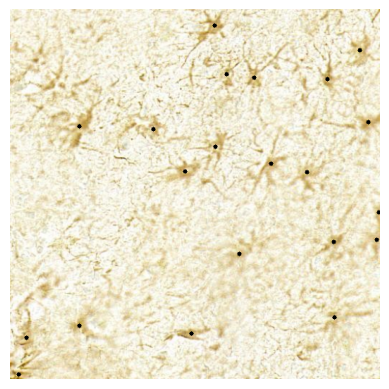

In [85]:
centroid_img=img.copy()
contours, hierarchy = cv2.findContours(median_blurred2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
centres=[]
for c in contours:
   
   M = cv2.moments(c)
 
   cX = int(M["m10"] / M["m00"])
   cY = int(M["m01"] / M["m00"])
   cv2.circle(centroid_img, (cX, cY), 3, (0, 0, 0), -1)
   centres.append((cX, cY))


   
plt.imshow(centroid_img,cmap='gray')
plt.axis('off')
plt.show()

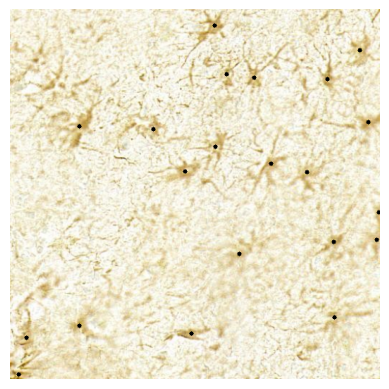

(525, 525, 3)


In [ ]:
floodfill=threshold_img.copy()
floodfill_blurred = cv2.medianBlur(floodfill, 3)
plt.imshow(floodfill_blurred,cmap='gray')
plt.axis('off')
plt.show()

floodfill_blurred_array=np.array(floodfill_blurred)
print(floodfill_blurred_array.shape)

0
255
255
0
255
0
255
255
255
255
255
255
255
255
255
255
0
255
255
255
255


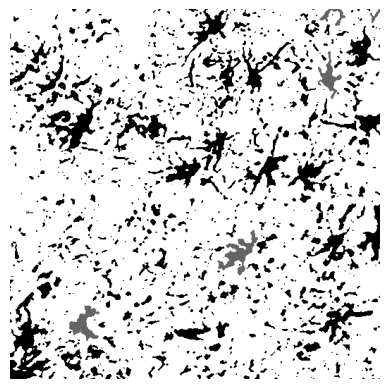

In [ ]:
#bfs flood fill 4-connected

from collections import deque

def flood_fill_multi_source(grid, sources, new_color):
    rows, cols = len(grid), len(grid[0])
    original_color = 0
    
    if original_color == new_color:
        return grid

    queue = deque(sources)
    
    while queue:
        x, y = queue.popleft()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == original_color:
                grid[nx][ny] = new_color  
                queue.append((nx, ny))
        grid[x][y] = new_color
    
    return grid


grid = floodfill_blurred_array.copy()
sources = [tuple(coord) for coord in centres]
for x, y in sources:
    grid[x][y]=0
new_color = 100

result = flood_fill_multi_source(grid, sources, new_color)
# for row in result:
#     print(row)
    
plt.imshow(result,cmap='gray')
plt.axis('off')  
plt.show()

# for x,y in centres:
#     print(grid[x][y])
#     cv2.circle(result, (x,y), 3, (255,0, 0), -1)
    
# plt.imshow(result)
# plt.axis('off')  
# plt.show()